In [1]:
#intial imports
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from numpy.core.umath_tests import inner1d
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

#read file
df = pd.read_csv("profiles.csv")

C:\Users\abdulmalik.aiyeleso\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")
C:\Users\abdulmalik.aiyeleso\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  # This is added back by InteractiveShellApp.init_path()


In [2]:
#print columns
print(df.columns)

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')


In [3]:
#see first five rows of data

df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [4]:
#column mapping
diet_mapping = {'mostly anything':0,'anything':0,'strictly anything':0,'mostly vegetarian':1,'mostly other':1,\
                'strictly vegetarian':1,'vegetarian':1,'strictly other':1,'mostly vegan':1,'other':1,'strictly vegan':1,\
                'vegan':1,'mostly kosher':1,'mostly halal':1,'strictly kosher':1,'strictly halal':1,'kosher':1,'halal':1}

drinks_mapping = {'not at all':0,'rarely':0.2,'socially':0.4,'often':0.6,'very often':0.8,'desperately':1}

drugs_mapping = {'never':0,'sometimes':0.5,'often':1}

education_mapping = {'graduated from law school':1, 'working on two-year college':0, 'dropped out of college/university':0,\
                     'working on ph.d program':1, 'college/university':1, 'graduated from space camp':1,\
                     'dropped out of space camp':0, 'graduated from med school':1, 'working on space camp':0,\
                     'working on law school':0, 'two-year college':1, 'working on med school':0,\
                     'dropped out of two-year college':0, 'dropped out of masters program':0, 'masters program':1,\
                     'dropped out of ph.d program':0, 'dropped out of high school':0, 'high school':0,\
                     'working on high school':0, 'space camp':1, 'ph.d program':1, 'law school':1,\
                     'dropped out of law school':0,'dropped out of med school':0,'med school':1}

job_mapping = {'other':1,'student':0,'science / tech / engineering':1,'computer / hardware / software':1,\
               'artistic / musical / writer':1,'sales / marketing / biz dev  ':1,'medicine / health ':1,'education / academia':1,\
               'executive / management':1,'banking / financial / real estate':1,'entertainment / media':1,'law / legal services':1,\
               'hospitality / travel':1,'construction / craftsmanship':1,'clerical / administrative':1,'political / government':1,\
               'rather not say':0,'transportation':1,'unemployed':0,'retired':1,'military':1}

offspring_mapping = {'doesn&rsquo;t have kids':0,'doesn&rsquo;t have kids, but might want them':0,\
                     'doesn&rsquo;t have kids, but wants them':0,'doesn&rsquo;t want kids':0,'has kids':1,'has a kid':1,\
                     'doesn&rsquo;t have kids, and doesn&rsquo;t want any':0,'has kids, but doesn&rsquo;t want more':1,\
                     'has a kid, but doesn&rsquo;t want more':1,'has a kid, and might want more':1,'wants kids':0,'might want kids':0\
                     ,'has kids, and might want more':1,'has a kid, and wants more':1,'has kids, and wants more':1}

pets_mapping = {'likes dogs and likes cats':1,'likes dogs':1,'likes dogs and has cats':1,'has dogs':1,'has dogs and likes cats':1,\
                 'likes dogs and dislikes cats':1,'has dogs and has cats':1,'has cats':1,'likes cats':1,\
                 'has dogs and dislikes cats':1,'dislikes dogs and likes cats':1,'dislikes dogs and dislikes cats':0,\
                 'dislikes cats':0,'dislikes dogs and has cats':1,'dislikes dogs':0}

smokes_mapping = {'no':0,'sometimes':0.50,'when drinking':0.50,'yes':1,'trying to quit':1}

status_mapping = {'single':True, 'seeing someone':False, 'available':True, 'married':False, 'unknown':False}


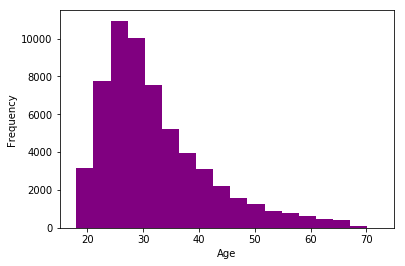

In [5]:
#Plot Age Histogram
plt.hist(df.age, bins=30, color='purple')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(15, 75)
plt.savefig('Age Histogram.png')
plt.show()

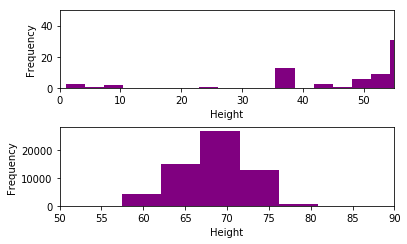

In [6]:
#Plot Height Histogram
mean_height = df['height'].mean(axis=0)
df['height'].fillna(mean_height,inplace=True)
plt.subplot(2,1,1)
plt.hist(df.height, bins=30, color='purple')
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.xlim(0, 55)
plt.ylim(0, 50)

plt.subplot(2,1,2)
plt.hist(df.height, bins=20, color='purple')
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.xlim(50, 90)
plt.subplots_adjust(hspace=0.50, bottom=0.2)
plt.savefig('Height Histogram.png')
plt.show()

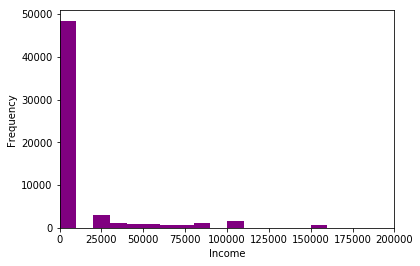

In [7]:
#Income Histogram
plt.hist(df.income, bins=100, color='purple')
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.xlim(-10, 200000)
plt.savefig('Income Histogram.png')
plt.show()

In [8]:
#These codes allocates 1 where diet is restricted or specific and 0 where diet is open
#All Nan are assumed to be open diet (0)
df['diet_mapped'] = df['diet'].map(diet_mapping)
df['diet_mapped'].fillna(0,inplace=True)
c = df.diet_mapped.value_counts(dropna=False)
p = df.diet_mapped.value_counts(dropna=False, normalize=True)
cp = pd.concat([c,100*p], axis=1, keys=['counts', '%'])
cp.sort_values(['%'])

,counts,%
1.0,7670,12.794849
0.0,52276,87.205151


In [9]:
#These codes allocates 0 - 1 based on frequency of drinking
#All Nan are assumed to be 0
df['drinks_mapped'] = df['drinks'].map(drinks_mapping)
df['drinks_mapped'].fillna(0,inplace=True)
c = df.drinks_mapped.value_counts(dropna=False)
p = df.drinks_mapped.value_counts(dropna=False, normalize=True)
cp = pd.concat([c,100*p], axis=1, keys=['counts', '%'])
cp.sort_values(['%'])

,counts,%
1.0,322,0.537150
0.8,471,0.785707
0.6,5164,8.614420
0.2,5957,9.937277
0.0,6252,10.429386
0.4,41780,69.696060


In [10]:
#These codes allocates 0 - 1 based on frequency of drugs
#All Nan are assumed to be 0
df['drugs_mapped'] = df['drugs'].map(drugs_mapping)
df['drugs_mapped'].fillna(0,inplace=True)
c = df.drugs_mapped.value_counts(dropna=False)
p = df.drugs_mapped.value_counts(dropna=False, normalize=True)
cp = pd.concat([c,100*p], axis=1, keys=['counts', '%'])
cp.sort_values(['%'])



,counts,%
1.0,410,0.683949
0.5,7732,12.898275
0.0,51804,86.417776


In [11]:
#These codes allocates 1 where employed in any form and 0 where obvioulsy not employed
df['education_mapped'] = df['education'].map(education_mapping)
df['education_mapped'].fillna(0,inplace=True)
c = df.education_mapped.value_counts(dropna=False)
p = df.education_mapped.value_counts(dropna=False, normalize=True)
cp = pd.concat([c,100*p], axis=1, keys=['counts', '%'])
cp.sort_values(['%'])

,counts,%
1.0,4481,7.475061
0.0,55465,92.524939


In [12]:
#These codes allocates 1 where employed in any form and 0 where obvioulsy not employed
#All Nan and 'rather not say' are assumed to be unemployed 
df['job_mapped'] = df['job'].map(job_mapping)
df['job_mapped'].fillna(0,inplace=True)
c = df.job_mapped.value_counts(dropna=False)
p = df.job_mapped.value_counts(dropna=False, normalize=True)
cp = pd.concat([c,100*p], axis=1, keys=['counts', '%'])
cp.sort_values(['%'])

,counts,%
0.0,21860,36.466153
1.0,38086,63.533847


In [13]:
#These codes allocates 1 where there is one or more offspring and 0 where there is no offspring
#All Nan are assumed to be 0
df['offspring_mapped'] = df['offspring'].map(offspring_mapping)
df['offspring_mapped'].fillna(0,inplace=True)
c = df.offspring_mapped.value_counts(dropna=False)
p = df.offspring_mapped.value_counts(dropna=False, normalize=True)
cp = pd.concat([c,100*p], axis=1, keys=['counts', '%'])
cp.sort_values(['%'])

,counts,%
1.0,4919,8.205718
0.0,55027,91.794282


In [14]:
#These codes allocates 1 where there is a like for either dog or cat and 0 where there is none and doesnt want any
#All Nan are assumed to be 0
df['pets_mapped'] = df['pets'].map(pets_mapping)
df['pets_mapped'].fillna(0,inplace=True)
c = df.pets_mapped.value_counts(dropna=False)
p = df.pets_mapped.value_counts(dropna=False, normalize=True)
cp = pd.concat([c,100*p], axis=1, keys=['counts', '%'])
cp.sort_values(['%'])

,counts,%
0.0,20283,33.835452
1.0,39663,66.164548


In [15]:
#These codes allocates 0-1 for fequency of smoking
#All Nan are assumed to be none smokers
df['smokes_mapped'] = df['smokes'].map(smokes_mapping)
df['smokes_mapped'].fillna(0,inplace=True)
c = df.smokes_mapped.value_counts(dropna=False)
p = df.smokes_mapped.value_counts(dropna=False, normalize=True)
cp = pd.concat([c,100*p], axis=1, keys=['counts', '%'])
cp.sort_values(['%'])

,counts,%
1.0,3711,6.190572
0.5,6827,11.388583
0.0,49408,82.420845


In [16]:
df['status'].fillna(0,inplace=True)
df['status_mapped'] = df['status'].map(status_mapping)
c = df.status_mapped.value_counts(dropna=False)
p = df.status_mapped.value_counts(dropna=False, normalize=True)
cp = pd.concat([c,100*p], axis=1, keys=['counts', '%'])
cp.sort_values(['%']) 

,counts,%
False,2384,3.976913
True,57562,96.023087


In [17]:
#Columns to be analysed
regression_columns = ['age','diet_mapped','drinks_mapped','drugs_mapped','education_mapped','job_mapped','offspring_mapped',\
                      'pets_mapped','smokes_mapped']

classification_columns = ['diet_mapped','drinks_mapped','drugs_mapped','education_mapped','job_mapped','offspring_mapped',\
                      'pets_mapped','smokes_mapped']

In [18]:
#Divide the data into training and validation data

lireg_train_data, lireg_test_data, lireg_train_labels, lireg_test_labels = \
train_test_split(df[regression_columns], df['age'], train_size = 0.8, test_size = 0.2, random_state = 100)
#lireg_train_data, lireg_train_labels = smt.fit_sample(lireg_train_data, lireg_train_labels)

loreg_train_data, loreg_test_data, loreg_train_labels, loreg_test_labels = \
train_test_split(df[regression_columns], df['status_mapped'], train_size = 0.8, test_size = 0.2, random_state = 100)
#loreg_train_data, loreg_train_labels = smt.fit_sample(loreg_train_data, loreg_train_labels)

class_train_data, class_test_data, class_train_labels, class_test_labels  = \
train_test_split(df[classification_columns], df['status_mapped'] , train_size = 0.8, test_size = 0.2, random_state = 100)

In [19]:
#Use SMOTE() to increase the minority classes in the training data.
smt = SMOTE()
class_train_data, class_train_labels = smt.fit_sample(class_train_data, class_train_labels)

In [21]:
#Use Support Vector Machine to classify the data
svmclassifier = SVC(random_state = 1)
svmclassifier.fit(class_train_data,class_train_labels)
print('Score for Support Vector Machine (Test Data): ',svmclassifier.score(class_test_data, class_test_labels))

Score for Support Vector Machine (Test Data):  0.38557130942452045


In [22]:
#SVMPredictions
svmpredicted_train_labels = svmclassifier.predict(class_train_data)
svmpredicted_test_labels = svmclassifier.predict(class_test_data)

In [46]:
#compute accuracy, recall, precision and f1_score
print('TRAINING DATA, SVM')
print('Accuracy = ',accuracy_score(class_train_labels,svmpredicted_train_labels))
print('Recall =', recall_score(class_train_labels,svmpredicted_train_labels,labels= status_labels,average='weighted'))
print('Precision = ',precision_score(class_train_labels,svmpredicted_train_labels,labels= status_labels,average='weighted'))
print ('F1 Score = ',f1_score(class_train_labels,svmpredicted_train_labels,labels= status_labels,average='weighted'))

print('TEST DATA, SVM')
print('Accuracy = ',accuracy_score(class_test_labels,svmpredicted_test_labels))
print('Recall =', recall_score(class_test_labels,svmpredicted_test_labels,labels= status_labels,average='weighted'))
print('Precision = ',precision_score(class_test_labels,svmpredicted_test_labels,labels= status_labels,average='weighted'))
print ('F1 Score = ',f1_score(class_test_labels,svmpredicted_test_labels,labels= status_labels,average='weighted'))


TRAINING DATA, SVM
Accuracy =  0.570490557846755
Recall = 0.570490557846755
Precision =  0.5826118099554306
F1 Score =  0.5541356498833839
TEST DATA, SVM
Accuracy =  0.38557130942452045
Recall = 0.38557130942452045
Precision =  0.932903736154958
F1 Score =  0.5173187567340622


In [35]:
#Use K Nearest Neighbours to classify the data
kclassifier_score = 0
for i in range(6,21):
    kclassifier = KNeighborsClassifier(n_neighbors = i+1)
    kclassifier.fit(class_train_data,class_train_labels)
    if kclassifier.score(class_test_data, class_test_labels) >  kclassifier_score:
        kclassifier_score = kclassifier.score(class_test_data, class_test_labels)
        k = i+1

print ('Score for K Nearest Neighbour: ', kclassifier_score)
print ('k = ',k)
        

Score for K Nearest Neighbour:  0.9326939115929942
k =  7


In [36]:
#KNeighbors Prediction 
kpredicted_train_labels = kclassifier.predict(class_train_data)
kpredicted_test_labels = kclassifier.predict(class_test_data)

In [55]:
#compute accuracy, recall, precision and f1_score
print('TRAINING DATA, K Nearest Neighbour')
print('Accuracy = ',accuracy_score(class_train_labels,kpredicted_train_labels))
print('Recall =', recall_score(class_train_labels,kpredicted_train_labels,average='weighted'))
print('Precision = ',precision_score(class_train_labels,kpredicted_train_labels,average='weighted'))
print ('F1 Score = ',f1_score(class_train_labels,kpredicted_train_labels,average='weighted'))

print('TEST DATA, K Nearest Neighbour')
print('Accuracy = ',accuracy_score(class_test_labels,kpredicted_test_labels))
print('Recall =', recall_score(class_test_labels,kpredicted_test_labels,average='weighted'))
print('Precision = ',precision_score(class_test_labels,kpredicted_test_labels,average='weighted'))
print ('F1 Score = ',f1_score(class_test_labels,kpredicted_test_labels,average='weighted'))


TRAINING DATA, K Nearest Neighbour
Accuracy =  0.552018667245496
Recall = 0.552018667245496
Precision =  0.6405134152199572
F1 Score =  0.4683036445545489
TEST DATA, K Nearest Neighbour
Accuracy =  0.9101751459549625
Recall = 0.9101751459549625
Precision =  0.9227752672902342
F1 Score =  0.9163576545865791


In [82]:
limodel = LinearRegression()
limodel.fit(lireg_train_data,lireg_train_labels)
print('Score for Linear Regression: ',limodel.score(lireg_test_data,lireg_test_labels))

Score for Linear Regression:  1.0


In [81]:
lomodel = LogisticRegression()
lomodel.fit(loreg_train_data,loreg_train_labels)
print('Score for Logistic Regression: ',lomodel.score(loreg_test_data,loreg_test_labels))

Score for Logistic Regression:  0.958465387823186


In [83]:
df[regression_columns].corr()

,age,diet_mapped,drinks_mapped,drugs_mapped,education_mapped,job_mapped,offspring_mapped,pets_mapped,smokes_mapped
age,1.000000,0.015379,-0.088795,-0.116448,0.043806,0.138749,0.409045,0.033979,-0.132111
diet_mapped,0.015379,1.000000,-0.040363,0.047099,0.006582,0.013276,0.006846,0.050154,-0.006704
drinks_mapped,-0.088795,-0.040363,1.000000,0.182684,0.006733,0.072199,-0.040935,0.072817,0.143974
drugs_mapped,-0.116448,0.047099,0.182684,1.000000,-0.027223,0.020167,-0.043143,0.058665,0.283751
education_mapped,0.043806,0.006582,0.006733,-0.027223,1.000000,-0.022397,0.014168,0.003106,-0.017242
job_mapped,0.138749,0.013276,0.072199,0.020167,-0.022397,1.000000,0.048209,0.102515,0.002012
offspring_mapped,0.409045,0.006846,-0.040935,-0.043143,0.014168,0.048209,1.000000,0.008397,-0.010481
pets_mapped,0.033979,0.050154,0.072817,0.058665,0.003106,0.102515,0.008397,1.000000,0.046169
smokes_mapped,-0.132111,-0.006704,0.143974,0.283751,-0.017242,0.002012,-0.010481,0.046169,1.000000
